In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from ukb_gwas import * # need to recopy back to scriptarchive, and re-link from here

In [2]:
oneCol = [0.97,0.88,0.93]
twoCol = [0.91,0.96,0.83]

stayers_b/chr2.all.glm.linear


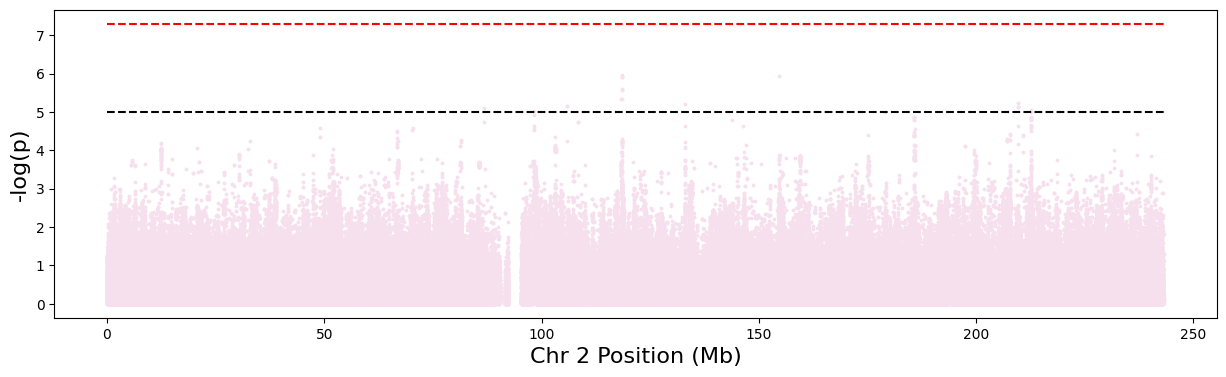

In [3]:
fdir1 = 'stayers_b/'
chrNum = 2
assocLinearFile1 = fdir1 + 'chr' + str(chrNum) + '.all.glm.linear'
print(assocLinearFile1)
oneInf=manhattanPlotOneChromosome(assocLinearFile1,chrNum,oneCol)

movers_b/chr2.all.glm.linear


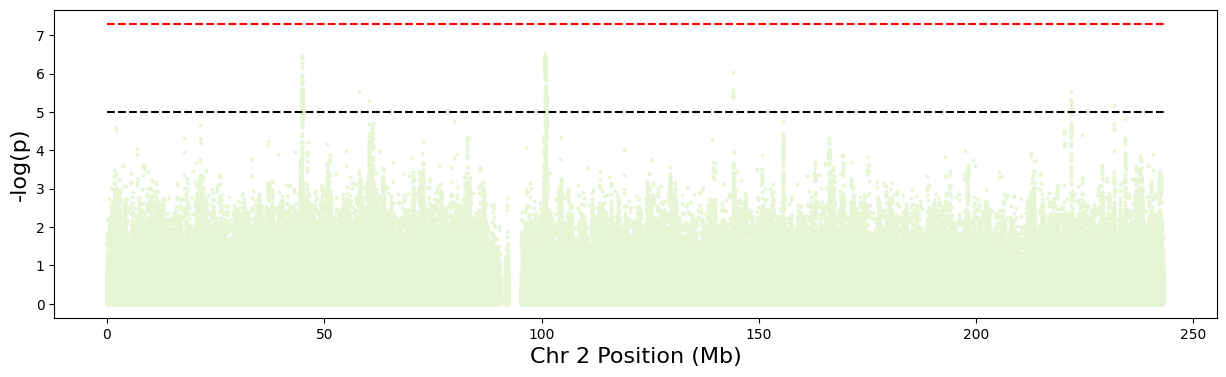

In [4]:
fdir2 = 'movers_b/'
#chrNum = 2
assocLinearFile2 = fdir2 + 'chr' + str(chrNum) + '.all.glm.linear'
print(assocLinearFile2)
twoInf=manhattanPlotOneChromosome(assocLinearFile2,chrNum,twoCol)

In [5]:
fstem = 'chr'
oneInfo = load_chromosomes(fstem,fdir1)
onePositions, oneVariants, onePvals, oneBetas, oneErrors = oneInfo 

stayers_b/chr21.all.glm.linear
done loading chromosomes


In [6]:
fstem = 'chr'
twoInfo = load_chromosomes(fstem,fdir2)
twoPositions, twoVariants, twoPvals, twoBetas, twoErrors = twoInfo

movers_b/chr21.all.glm.linear
done loading chromosomes


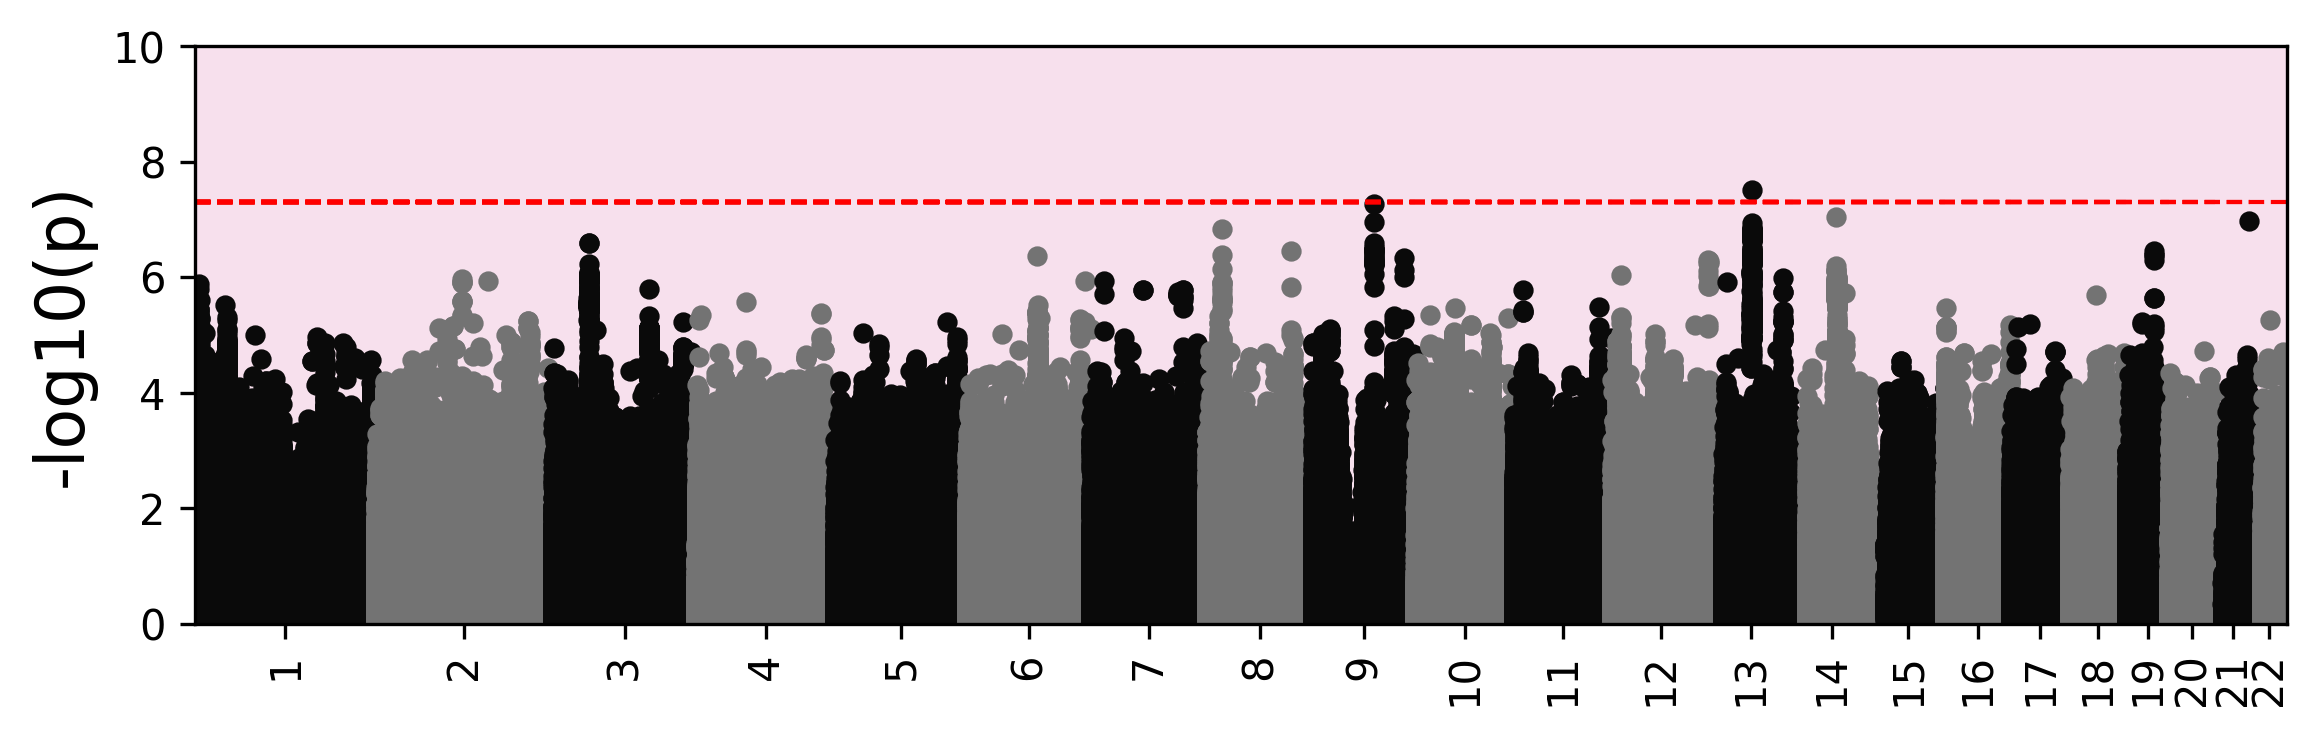

In [7]:
plt.style.use('default')
manhattanPlotGenome(onePositions,onePvals,10,snp_locs={},flip=False,axcolor=oneCol)

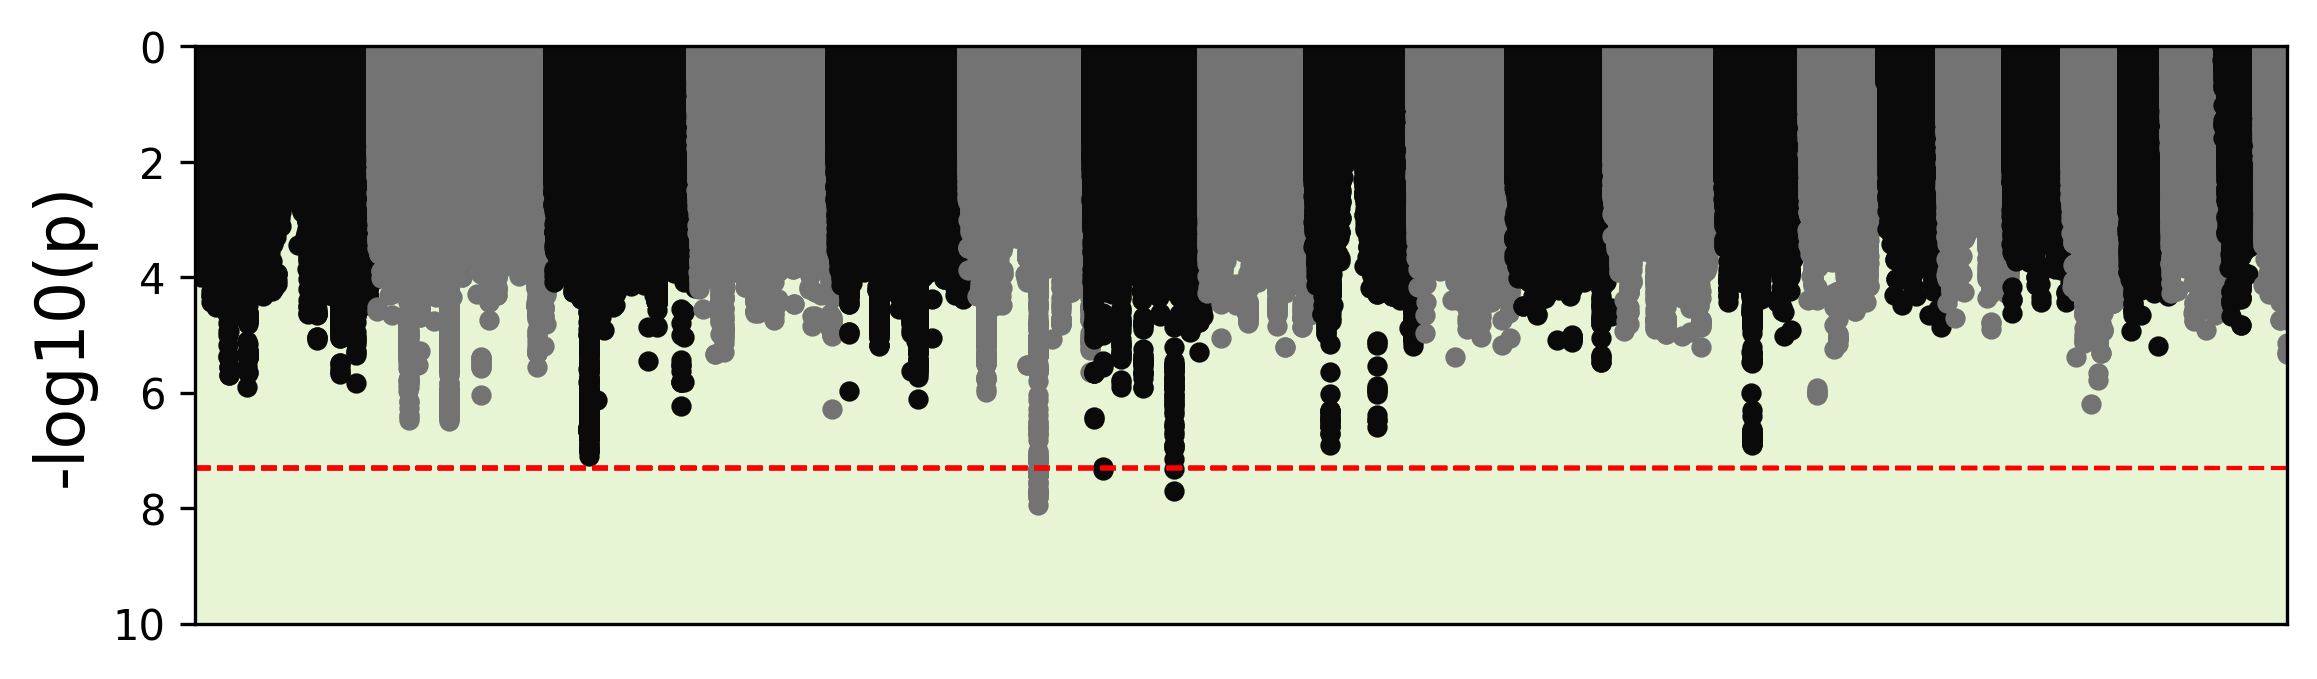

In [8]:
plt.style.use('default')
manhattanPlotGenome(twoPositions,twoPvals,10,snp_locs={},flip=True,axcolor=twoCol)

In [ ]:
# aside ... kind of weird that these do not line up nicely with old mover/stayer GWAS. 
# Double check that I have the right eid's = OK
# def get_eidlist(idfile):
#     eid_list = []
#     with open(idfile,'r') as f:
#         for line in f:
#             eid_list.append(line.rstrip().split()[0])
#     return eid_list

# movers_a = get_eidlist('movers_a/movers_a.csv')
# movers_b = get_eidlist('movers_b/movers_b.csv')
# stayers_a = get_eidlist('stayers_a/stayers_a.csv')
# stayers_b = get_eidlist('stayers_b/stayers_b.csv')
# eq_movers = get_eidlist('equalized_wba_movers.csv')
# eq_stayers = get_eidlist('equalized_wba_stayers.csv')

# print(len(set(movers_a)),len(set(eq_movers)),len(set(movers_a)&set(eq_movers)))
# print(len(set(movers_b)),len(set(eq_movers)),len(set(movers_b)&set(eq_movers)))
# print(len(set(stayers_a)),len(set(eq_stayers)),len(set(stayers_a)&set(eq_stayers)))
# print(len(set(stayers_b)),len(set(eq_stayers)),len(set(stayers_b)&set(eq_stayers)))
# print(len(set(stayers_a)),len(set(eq_movers)),len(set(stayers_a)&set(eq_movers)))
# print(len(set(stayers_b)),len(set(eq_movers)),len(set(stayers_b)&set(eq_movers)))

### dealing with data of different format, e.g. from Okbay (EA3, nonUKB, non23-and-me)
all snps, not sorted by chromosome or position

In [3]:
# load into data frame
fname = 'EA3_excl_23andMe_UKB.meta'
d = pd.read_csv(fname, delimiter = '\t') # about 7 seconds to load
d.head(5)

,rsID,Chr,BP,EA,OA,EAF,N,Z_unadj,P_unadj,Z,P,BETA,SE,SE_unadj
0,rs667647,5,29439275,T,C,0.3685,321652.00,0.410,0.6821,0.396,0.6918,0.001060,0.002670,0.002585
1,rs113534962,5,85928892,T,C,0.0627,305732.98,-0.027,0.9788,-0.026,0.9795,-0.000142,0.005450,0.005275
2,rs2366866,10,128341232,T,C,0.4468,323365.00,-0.315,0.7526,-0.305,0.7603,-0.000788,0.002584,0.002501
3,rs472303,3,62707519,T,C,0.0529,324162.03,-0.929,0.3530,-0.899,0.3686,-0.005155,0.005732,0.005549
4,rs62099898,18,51112281,T,C,0.7195,323618.01,-1.388,0.1651,-1.344,0.1791,-0.003840,0.002858,0.002767


In [4]:
# testing some code
# for a given chromosome, sort by position
print(len(d))
chrNum = 5
dChr = d[d.Chr == chrNum].sort_values(by='BP')
print(len(dChr))
dChr.head(3)

5528712
363638


,rsID,Chr,BP,EA,OA,EAF,N,Z_unadj,P_unadj,Z,P,BETA,SE,SE_unadj
346346,rs10475309,5,23015,A,G,0.2548,307258.97,-0.660,0.5090,-0.639,0.5227,-0.001932,0.003024,0.002927
5048309,rs9313223,5,25328,A,G,0.2542,307259.01,-0.614,0.5391,-0.594,0.5522,-0.001799,0.003027,0.002930
3472270,rs10045830,5,25452,T,G,0.7456,307259.01,0.597,0.5508,0.577,0.5636,0.001749,0.003026,0.002929


In [5]:
# testing more code
stuff = dChr.P.values
print(stuff[:5])

[0.5227 0.5522 0.5636 0.9152 0.9047]


In [4]:
variants = {}  # key = chromosome numbers; values = list of SNPs
positions = {} # key = chromosome numbers; values = list of positions
pvals = {}     # key = chromosome numbers; values = list of pvals
betas = {}     # key = chromosome numbers; values = list of betas
errors = {}    # key = chromosome numbers; values = list of betas
for chrNum in np.arange(1,23):
    dChr = d[d.Chr == chrNum].sort_values(by='BP')
    variants[chrNum] = dChr.rsID.values
    positions[chrNum] = dChr.BP.values
    pvals[chrNum] = [-np.log10(p) for p in dChr.P.values]
    betas[chrNum] = dChr.BETA.values
    errors[chrNum] = dChr.SE.values

In [5]:
oneInfo = positions, variants, pvals, betas, errors
# and then try manhattan plots

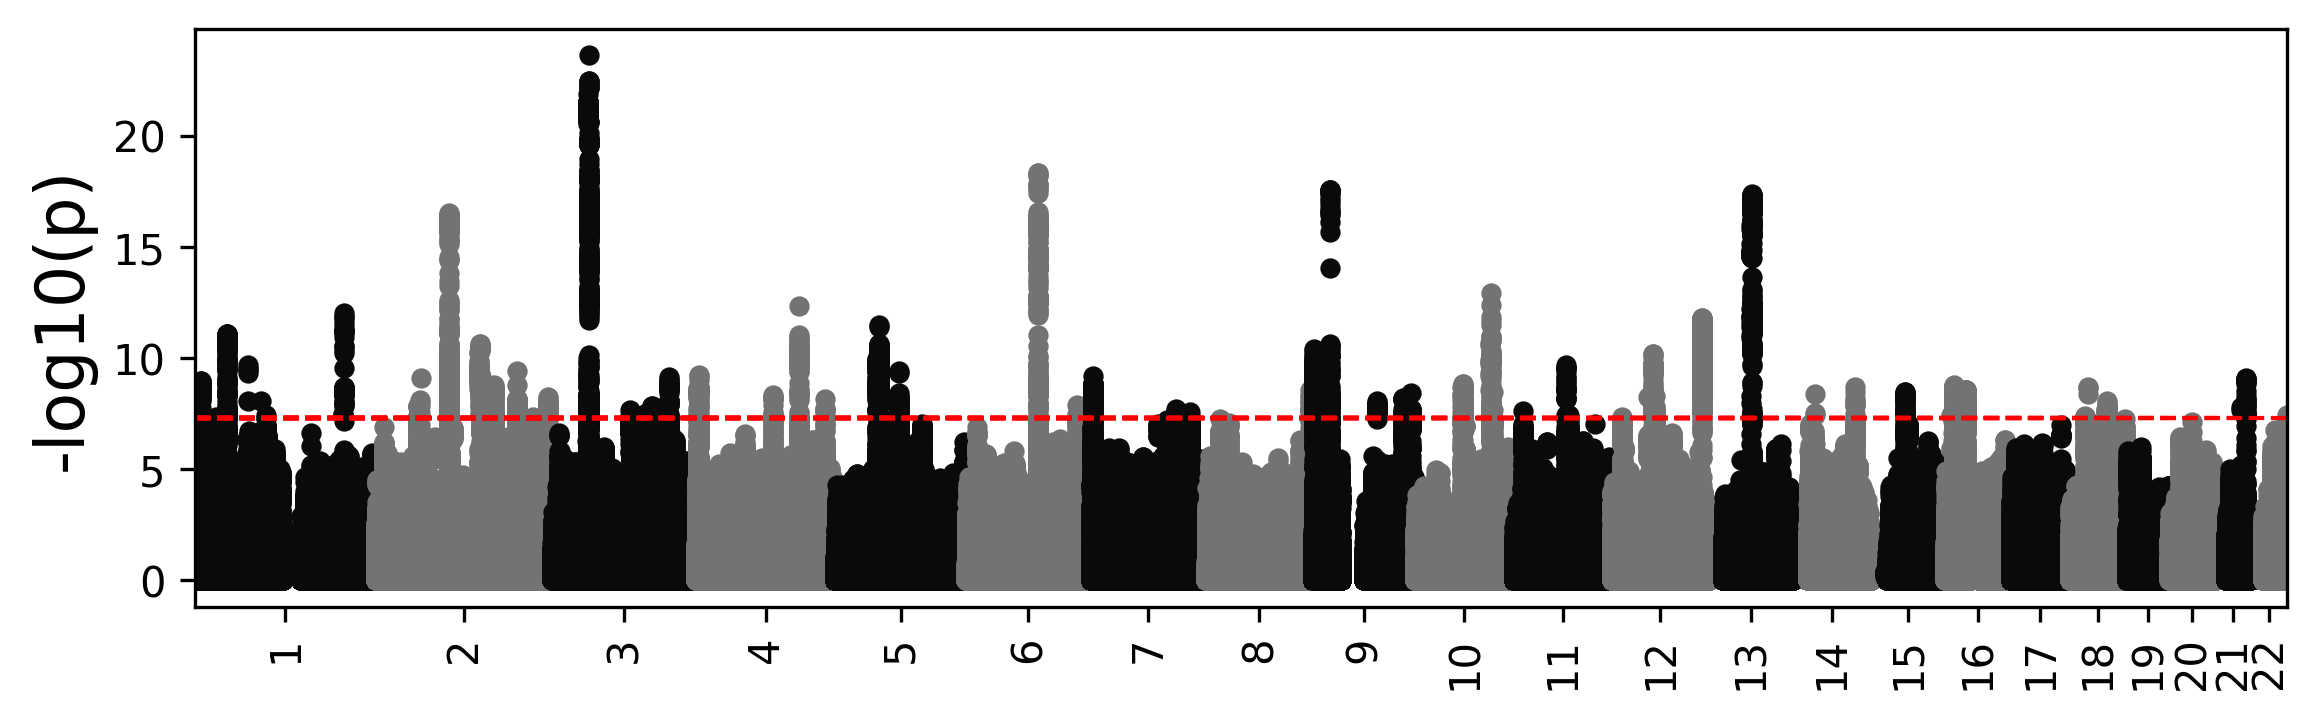

In [6]:
manhattanPlotGenome(positions,pvals)

# lead SNPs

In [7]:
# testing get_locations code here

pos,snps,pvals,betas,errs = oneInfo
chrNum = 10
pvalthreshold = -np.log10(1e-5)

# get a list of [beginning position,end position] for a given chromosome
# loci = get_locations(pvalthreshold,positionlist,snplist,pvallist)
loci = get_locations(pvalthreshold,pos[chrNum],snps[chrNum],pvals[chrNum])
print(loci)
print(len(loci))

[[64827663, 65365385], [67834788, 68670217], [90054268, 90091540], [103493226, 104909890], [106403162, 106812116], [111246607, 111285643], 118909289, [126229598, 126234739], [127662157, 127730144]]
9


In [8]:
# test max_snp_in_range code here
# find max snp in a given range
# maxsnp, maxpos, maxpval, maxbeta = max_snp_in_range(boundaries,positionlist,snplist,pvallist,betalist)

for locus in loci:
    maxsnp, maxpos, maxpval, maxbeta, maxerr = max_snp_in_range(locus,pos[chrNum],snps[chrNum],pvals[chrNum],betas[chrNum],errs[chrNum])
    print(maxsnp, maxpos, maxpval)

rs10761741 65066186 8.851397345193906
rs7914680 67965010 6.993533957750769
rs11202702 90054268 5.474955192963154
rs11191193 103802408 12.926648297613099
rs2491365 106536976 8.458670422333306
rs7088557 111264264 5.402414498247795
rs73385301 118909289 5.282912275072981
rs10901757 126234739 5.805208242278075
rs7903058 127679164 5.993533957750769


In [28]:
# save or print out lead snps and summaries for a given GWAS

gwas_name = 'ea3_noUKB'
pvalthreshold = -np.log10(1e-5)
                          
pos,snps,pvals,betas,errs = oneInfo

summaryFile = gwas_name + '_lead_snps.csv'
o = open(summaryFile,'w')

o.write('chrom,snp,position,pval,beta,err\n')

for chrom in np.arange(1,23):
    print('chrom ' , chrom)
    loci = get_locations(pvalthreshold,pos[chrom],
                               snps[chrom],pvals[chrom])

    for locus in loci:
        s,p,pv,b,e = max_snp_in_range(locus,pos[chrom],snps[chrom],
                           pvals[chrom],betas[chrom],errs[chrom])
        toPrint = ','.join([str(x) for x in [chrom,s,p,pv,b,e]])
        o.write(toPrint + '\n')
o.close()


chrom  1
chrom  2
chrom  3
chrom  4
chrom  5
chrom  6
chrom  7
chrom  8
chrom  9
chrom  10
chrom  11
chrom  12
chrom  13
chrom  14
chrom  15
chrom  16
chrom  17
chrom  18
chrom  19
chrom  20
chrom  21
chrom  22


In [12]:
# playing with code
snp = 'rs639094'
d[d.rsID == snp]

,rsID,Chr,BP,EA,OA,EAF,N,Z_unadj,P_unadj,Z,P,BETA,SE,SE_unadj
4372695,rs639094,6,168294970,T,C,0.648,321729.0,-4.855,0.000001,-4.699,0.000003,-0.012673,0.002697,0.00261


In [ ]:
snp = 'rs10475309'
print(d[d.rsID == snp].EA.values[0])

In [10]:
# make table from Okbay:
# chrom,snp,position,pval,beta,err,positiveAllele,negativeAllele
# takes awhile . . . 

gwas_name = 'ea3_noUKB'
summaryFile = gwas_name + '_lead_snps.csv'

o = open(gwas_name + '_positive_leads.csv', 'w')

with open(summaryFile,'r') as f:
    for line in f:
        stripped = line.rstrip()
        if stripped.startswith('chrom'):
            o.write(stripped + ',positiveBeta,positiveAllele,negativeAllele\n')
        else:
            stuff = stripped.split(',')
            beta = float(stuff[4])
            snp = stuff[1]
            if beta > 0:
                posbeta = str(beta)
                positiveAllele = d[d.rsID == snp].EA.values[0]
                negativeAllele = d[d.rsID == snp].OA.values[0]
            else: # if beta is negative
                positiveAllele = d[d.rsID == snp].OA.values[0]
                negativeAllele = d[d.rsID == snp].EA.values[0]
                posbeta = str(np.abs(beta))
            stuff.extend([posbeta,positiveAllele,negativeAllele])
            o.write(','.join(stuff) + '\n')
o.close()

In [ ]:
# getting standard snp set for EDUYEARS
eduyears_lead_snps = pd.read_excel('41588_2018_147_MOESM3_ESM.xlsx', 
                                  sheet_name = '2. EduYears Lead SNPs',
                                  skipfooter = 2, header = 1, index_col = None )
snplist = eduyears_lead_snps.sort_values(by='P-value',ascending=True).SNP.tolist()
print(len(snplist))
print(snplist[:5])
eduyears_lead_snps.head(3)

# add these snp positions to manhattan plot?
num_to_get = 25
topPvals = eduyears_lead_snps.sort_values(by='P-value',ascending = True).head(num_to_get)

# make dictionary ... key = Chr, vals = list of positions
snp_locs = {}
for chrom in np.arange(1,23):
    thisChrom = topPvals[topPvals.Chr==chrom].Position.tolist()
    if len(thisChrom) > 0:
        snp_locs[chrom] = sorted(thisChrom)

In [ ]:
# getting standard snp set for BMI
bmi_giant = pd.read_csv('Locke_GIANT_bmi_snps.txt',delimiter = '\t')
snplist = bmi_giant.SNP.tolist()
print(len(snplist))
print(snplist[:5])
snp_list_no_dups = list(set(snplist))
print(len(snp_list_no_dups))
bmi_snps = snp_list_no_dups

# add these snp positions to manhattan plot?
num_to_get = 30
topPvals = bmi_giant.sort_values(by='P',ascending = True).head(num_to_get)

# make dictionary ... key = Chr, vals = list of positions
bmi_snp_locs = {}
for chrom in np.arange(1,23):
    thisChrom = topPvals[topPvals.CHR==chrom].POS.tolist()
    if len(thisChrom) > 0:
        bmi_snp_locs[chrom] = sorted(thisChrom)
snp_locs = bmi_snp_locs

# calculate lambda GC genomic control

In [ ]:
# # get pvals and zstats for all snps in the GWAS
stayerPvals = []
fdir = 'eduyears_wba_stayers_agecubed/'
for chrom in np.arange(1,23):
    fname = fdir + '/chr' + str(chrom) + '.all.glm.linear'
    chromDf = pd.read_csv(fname,delimiter = '\t')
    stayerPvals.extend(chromDf.P.values)

# # get pvals and zstats for all snps in the GWAS
moverPvals = []
fdir = 'eduyears_wba_movers_agecubed/'
for chrom in np.arange(1,23):
    fname = fdir + '/chr' + str(chrom) + '.all.glm.linear'
    chromDf = pd.read_csv(fname,delimiter = '\t')
    moverPvals.extend(chromDf.P.values)

stayerPvals = np.array(stayerPvals)
stayerPvals_nonan = stayerPvals[np.where(np.isnan(stayerPvals)==False)]

moverPvals = np.array(moverPvals)
moverPvals_nonan = moverPvals[np.where(np.isnan(moverPvals)==False)]

median_stayerP = np.median(stayerPvals_nonan)
median_moverP = np.median(moverPvals_nonan)

median_stayerChi = stats.chi2.isf(median_stayerP, 1)
median_moverChi = stats.chi2.isf(median_moverP, 1)
print(median_stayerChi,median_moverChi)

lambda_gc_stayer = median_stayerChi / (0.675**2)
lambda_gc_mover = median_moverChi / (0.675**2)
print(lambda_gc_stayer,lambda_gc_mover)

In [ ]:
# collect max snp at each locus: position, pval, beta
# and save summary file
pvalthreshold = -np.log10(1e-5)

summaryFile = phenotype + '_stayers_movers.csv'
o = open(summaryFile,'w')

o.write('chrom,snpOne,snpTwo,posOne,posTwo,pvalOne,pvalTwo,betaOne,betaTwo\n')
for chrom in np.arange(1,23):
    print('chrom ' , chrom)
    oneLoci = get_locations(pvalthreshold,onePositions[chrom],
                               oneVariants[chrom],onePvals[chrom])
    twoLoci = get_locations(pvalthreshold,twoPositions[chrom],
                               twoVariants[chrom],twoPvals[chrom])
    locs = merge_locations(oneLoci,twoLoci)
    for boun in locs:
        s1,pos1,pval1,b1 = e(boun,onePositions[chrom],oneVariants[chrom],
                           onePvals[chrom],oneBetas[chrom])
        s2,pos2,pval2,b2 = max_snp_in_range(boun,twoPositions[chrom],twoVariants[chrom],
                           twoPvals[chrom],twoBetas[chrom])
        toPrint = ','.join([str(x) for x in [chrom,s1,s2,pos1,pos2,pval1,pval2,b1,b2]])
        o.write(toPrint + '\n')
o.close()

In [ ]:
phenotype = 'height'
summaryFile = phenotype + '_stayers_movers.csv'
summary = pd.read_csv(summaryFile)
print(len(summary))
summary.sort_values(by='betaOne',ascending=True).head(10)

# load summary file

In [ ]:
phenotype = 'eduyears'
summaryFile = phenotype + '_stayers_movers.csv'
summary = pd.read_csv(summaryFile)
print(len(summary))
summary = summary.drop_duplicates()
print(len(summary))
summary.sort_values(by='betaOne',ascending=True).head(10)

In [ ]:
allsnps = list(set(summary.snpOne.tolist() + summary.snpTwo.tolist()))
#allsnps.remove('rs539708795')
print(len(allsnps))
snp_info1 = snpList_to_info(allsnps,onePositions, oneVariants, onePvals, oneBetas)
snp_info2 = snpList_to_info(allsnps,twoPositions, twoVariants, twoPvals, twoBetas)

In [ ]:
sigThreshold = 5e-8

oneThreshold = summary[summary.pvalOne > -np.log10(sigThreshold)].snpOne.tolist()
twoThreshold = summary[summary.pvalTwo > -np.log10(sigThreshold)].snpOne.tolist()
rowsMeetingThreshold = list(set(oneThreshold + twoThreshold))

thresholdedDf = summary[summary.snpOne.isin(rowsMeetingThreshold)]

chrdf = thresholdedDf[thresholdedDf.chrom.isin(np.arange(1,5))]
chrdfsig = chrdf.sort_values(by=['chrom','posOne'],ascending=True)
print(len(chrdfsig))
chrdfsig.head(15)

In [ ]:
def getRectColor(pval):
    if pval > -np.log10(5e-8):
        cl = [1,0.3,0.3]
    elif pval > -np.log10(1e-5):
        cl = [1,1,0]
    elif pval > -np.log10(5e-2):
        cl = [0.8,1,0.9]
    else:
        cl = [1,1,1]
    return cl

numRows = len(chrdfsig)
chrNum = 0.5
chrPos = chrNum + 0.2
rectOneX = chrPos + 0.8
pvalOnePos = rectOneX + 0.05
rectTwoX = rectOneX + 0.5
pvalTwoPos = rectTwoX + 0.05
rectWidth = 0.4
rectHeight = 0.8

f,a = plt.subplots(figsize = (5,14))
a.set_ylim([0,numRows+1])
a.set_xlim([0,rectTwoX+1])

ypos = 1
for i,row in chrdfsig.iterrows():
    a.text(chrNum,ypos,row['chrom'])
    a.text(chrPos,ypos,row['posOne'])
    colOne = getRectColor(row['pvalOne'])
    rect = patches.Rectangle((rectOneX,ypos-0.2),rectWidth,rectHeight,
                             edgecolor='none',facecolor = colOne)
    a.add_patch(rect)
    pvOne = '{:2.1f}'.format(row['pvalOne'])
    a.text(pvalOnePos,ypos,pvOne)
    
    colTwo = getRectColor(row['pvalTwo'])
    rect = patches.Rectangle((rectTwoX,ypos-0.2),rectWidth,rectHeight,
                             edgecolor='none',facecolor = colTwo)
    a.add_patch(rect)
    pvTwo = '{:2.1f}'.format(row['pvalTwo'])
    a.text(pvalTwoPos,ypos,pvTwo)
    
    
    
    ypos = ypos + 1 

a.axis('off')
plt.show()

In [ ]:
snplist = chrdfsig.snpOne.tolist()
pval_comp_plot(snplist, snp_info1, snp_info2)

In [ ]:
pvalthreshold = -np.log10(5e-8)

# uncomment one of these
snplist = summary[summary.pvalOne > pvalthreshold].snpOne.tolist()
#snplist = summary[summary.pvalTwo > pvalthreshold].snpTwo.tolist()
#snplist.remove('rs539708795')
beta_comp_plot(snplist, snp_info1, snp_info2, 0.5)

In [ ]:
pval_comp_plot(snplist, snp_info1, snp_info2)

In [ ]:
decreasers_increasers_plot(snplist, snp_info1, snp_info2)

In [ ]:
# p value counts >= threshold
threshold = -np.log10(5e-8)

print('Number of loci in table:    ', len(summary))
print('gwas 1 significant loci:    ', len(summary[summary.pvalOne>=threshold]))
print('gwas 2 significant loci:    ', len(summary[summary.pvalTwo>=threshold]))

# mean percent difference in p-values
pOne = summary[summary.pvalOne >= threshold].pvalOne.tolist()
pTwo = summary[summary.pvalTwo >= threshold].pvalTwo.tolist()
percDiffPvals = [abs(pval - pTwo[i]) / float(pval) * 100 for i,pval in enumerate(pOne)]
print('Mean percent Diff P-val:    ','{:2.1f}%'.format(np.mean(percDiffPvals)))